In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import astropy.constants as cte
import astropy.units as un
from astropy.cosmology import Planck15 as cosmo
import emcee
import scipy
from scipy import optimize as op
import corner
import os
os.environ["OMP_NUM_THREADS"] = "8"
from multiprocessing import Pool
import time
from datetime import datetime 

from scipy.optimize import minimize

In [2]:
c=cte.c
c_um=c.to("um/s")
c_mm=c.to("mm/s")

c = c.value # m/s

Msun=cte.M_sun
Msun = Msun.value # kg

h = cte.h.value

K=cte.k_B.value

In [3]:
file = open("/Users/mariajesusfloresmoraga/Desktop/DSFG/book2.csv")
csvreader = csv.reader(file)
header = []
header = next(csvreader)

rows = []
for row in csvreader:
        rows.append(row)

ID= []

z=[]

S3=[]
errS3=[]

S2=[]
errS2=[]

S1=[]
errS1=[]

S870=[]
errS870=[]

S500=[]
errS500=[]

S350=[]
errS350=[]

S250=[]
errS250=[]

S160=[]
errS160=[]

S100=[]
errS100=[]

for j in rows:   
    
    ID.append(j[0])
    z.append(float(j[1]))
    S3.append(float(j[2]))
    errS3.append(float(j[3]))
    S2.append(float(j[4]))
    errS2.append(float(j[5]))
    S1.append(float(j[6]))
    errS1.append(float(j[7]))
    S870.append(float(j[8]))
    errS870.append(float(j[9]))
    S500.append(float(j[10]))
    errS500.append(float(j[11]))
    S350.append(float(j[12]))
    errS350.append(float(j[13]))
    S250.append(float(j[14]))
    errS250.append(float(j[15]))
    S160.append(float(j[16]))
    errS160.append(float(j[17]))
    S100.append(float(j[18]))
    errS100.append(float(j[19]))
   

In [82]:
v__=np.array([500,350,250,160,100])*un.um
v_=(c_um/v__).to("Hz")
v=v_.value
l__=np.array([95,150,220])*un.GHz
l_=l__.to("Hz")
l=l_.value
vf=np.concatenate((l,v))
#print((vf*un.Hz).to("GHz"))

In [5]:
frecsT_l=[]
errfT_l=[]
for m in range (len(rows)):
    
    frec=[S3[m],S2[m],S1[m],S500[m],S350[m],S250[m],S160[m],S100[m]]
    errf=[errS3[m],errS2[m],errS1[m],errS500[m],errS350[m],errS250[m],errS160[m],errS100[m]]
    frecsT_l.append(frec)
    errfT_l.append(errf)

In [83]:
def clean(a,b):
    f=[]
    e=[]
    inf=[]
    ine=[]
    #print(a)
    for x in a:
        #print("len x:",len(x))
        inf_=[]
        #print("x:",x)
        for m in x:
            #print("m:",m)
            if np.isnan(m)==True:
                indice=x.index(m)
                inf_.append(indice)
                inf.append(inf_)
                newf=list(np.delete(x,indice))
                #print("newf:",newf)
                f.append(newf)
                #print("indice:",indice)
            else:
                f.append(x)
            
    for y in b:
        ine_=[]
        for n in y:
            if np.isnan(n)==True:
                indice=y.index(n)
                ine_.append(indice)
                ine.append(ine_)
                newe=list(np.delete(y,indice))
                #print("newe:",newe)
                e.append(newe)
                #print("indice:",indice)
            else:
                e.append(y)
                
            
    return (f,inf,e,ine)


Esta función recién creada funciona recursivamente (sí es medio raro, pero no pude crear algo mejor...)

In [84]:
r1=clean(frecsT_l,errfT_l)
#r1

In [85]:
rf=[]
re=[]
for i in range(len(rows)):
        rf.append(r1[0][7*(i+1)+i])
        re.append(r1[2][7*(i+1)+i])
#print(rf)

In [86]:
r2=clean(rf,re) #si no hacemos esto, el resultado tiene más aún más listas
#r2[0]

In [87]:
for m in r2[0]:
    l6=[]
    l7=[]
    l8=[]
    print(len(m))
    if len(m)==6:
        l6.append(m)
    else:
        if len(m)==7:
            l7.append(m)
        else:
            l8.append(m)
#print(l7)

8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
6
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
7
7
7
7
7
7
6
8
8
8
8
8
8
7
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
7
7
7
7
7
7
6
8
8
8
8
8
8
8
8
8
8
8
8


In [88]:
r3=clean(r2[0],r2[2])
#r3

In [89]:
def tau(z,M_,d_,vf): 
    vf=vf*un.Hz
    d_=d_*un.kpc
    v0=353*un.GHz
    b=2
    M=Msun * 10** M_
    k0=0.15*(un.m**2/un.kg) 
    tau=k0*(vf/v0)**b *(z+1)**b * M/(np.pi*(d_/2)**2)
    return tau.to("")

In [90]:
def P(vf,T,z):
    vf=vf*un.Hz
    T=T*un.K
    h=cte.h
    K=cte.k_B
    A=2*h/(c**2)
    a=(h*vf*(1+z)/(K*T))
    B=vf**3/(np.e**(a.value) -1)
    P=(A*B).to("mJy")
    return P

In [91]:
def modelSv(vf,z,T,M_,d_):
    
    b=2
    v0=353*un.GHz
    D=cosmo.angular_diameter_distance(z)
    M=Msun*(10**M_)
    
    TAU=tau(z,M_,d_,vf)
    PL=P(vf,T,z)
    
    vf=vf*un.Hz
    T=T*un.K
    d_=d_*un.kpc
    
    O=np.pi*(d_/2)**2 * (D**-2)
    
    S_=O*(1-np.e**-TAU)*PL
    S=S_.to("mJy")
    return S.value

In [92]:
def A(z,Tc,M_,d_,vf): 


    v0=353*un.GHz
    b=2
    
    Tc=Tc*un.K
    Tvariable=(np.linspace(Tc.value,1000,10000)) *un.K
    
    integrales=[]
    
    for i in vf:
        ARG = modelSv(i,z,Tvariable,M_,d_)*un.mJy *(Tvariable)**-7
        integrales.append(scipy.integrate.trapz(ARG,x=Tvariable))
    
    return integrales

In [93]:
zD = np.linspace(0.,1000,100000)
D = scipy.interpolate.interp1d(zD, cosmo.angular_diameter_distance(zD).to("m").value, kind='linear')

def modelSv(vf,z,T,M_,d_):
    
    vf=vf # Hz
    d_=d_*3.08567758128e19 #kpc to m
    v0=353.0*1e9 #GHz to Hz
    b=2.
    M=Msun * 10.** M_
    k0=0.15 # m**2 / kg
    tau=k0*(vf/v0)**b *(z+1.)**b * M/(np.pi*(d_/2)**2)

    A=2*h/(c**2)
    a=(h*vf*(1+z)/(K*T))
    B=vf**3/(np.e**(a) -1)
    P=A*B
    
    b=2
    D_ = D(z)

    TAU=tau
    PL=P

    O=np.pi*(d_/2)**2 * (D_**-2)
    
    S_=O*(1-np.e**-TAU)*PL*1e29

    return S_

In [94]:
def ml_S(ID,Flux,errFlux): #Single
    
    #popt,pconv = scipy.optimize.curve_fit(modelSv,vf,frecsT,[3.,50.,10.,4.],bounds=([1,10,8,2],[10,100,11,4])) 
    
    #z_fit,T_fit,M_fit,d_fit = popt

    
    nll = lambda *args: -lnlike(*args)
    
    bnds = ((1,10),(None,None),(8,10.5),(2,7),(-np.inf,-1))
    
    sol = minimize(nll, [4.,55.,9.5,3.5,-1], args=(vf, Flux, errFlux,"S"),bounds=bnds)
    z_fit, T_fit, M_fit, d_fit, lnf_fit = sol.x
    
    
    plt.figure(figsize=(12,9))

    pm = [z_fit,T_fit,M_fit,d_fit]
    
    x = np.linspace(90,2000,100)*un.GHz
    x = x.to("Hz")
    x = x.value

    y = modelSv(x,pm[0],pm[1],pm[2],pm[3])

    plt.plot(x,y,label="MaxL")
    plt.plot(vf,np.array(Flux),marker="o",label="Data")
    plt.xscale("log")
    plt.yscale("log")
    plt.annotate(r"$z:{},T:{},M:{},d:{}$".format(np.round(z_fit,2),np.round(T_fit,2),np.round(M_fit,2),np.round(d_fit,2)),(5*10**11,5),fontsize=14)

    plt.ylabel("Flux (mJy)",fontsize=14)
    plt.xlabel("Frequency (Hz)",fontsize=14)
    plt.title("MaxL: {}".format(ID),fontsize=14)
    plt.legend()
    plt.savefig("fit_S_{}".format(ID),dpi=300,format="png")
    return(z_fit, T_fit, M_fit, d_fit)

In [95]:
def ml_PL_lim(ID,Flux,errFlux): #PL
    
    #popt,pconv = scipy.optimize.curve_fit(modelSobs,vf,frecsT,[3.,35,10.,4.],bounds=([1,20,8,2,0.],[10,50,11,4,-10.]))
    
    #z_fit,T_fit,M_fit,d_fit = popt
    
        
    nll = lambda *args: -lnlike(*args)
    
    bnds = ((1,10),(None,None),(8,10.5),(2,7),(-np.inf,-1))
    
    sol = minimize(nll, [4.,35.,9.5,3.5,-0.5], args=(vf, Flux, errFlux,"PL lim"),bounds=bnds)
    z_fit, T_fit, M_fit, d_fit,lnf_fit = sol.x
    
    
    
    plt.figure(figsize=(12,9))


        
    pm = [z_fit,T_fit,M_fit,d_fit]
    
    x = np.linspace(90,2000,100)*un.GHz
    x = x.to("Hz")
    x = x.value

    y  = modelSobs(x,pm[0],pm[1],pm[2],pm[3])
    
    

    plt.plot(x,y,label="MaxL")
    plt.plot(vf,np.array(Flux),marker="o",label="Data")
    plt.xscale("log")
    plt.yscale("log")
    plt.annotate(r"$z:{},T:{},M:{},d:{}$".format(np.round(z_fit,2),np.round(T_fit,2),np.round(M_fit,2),np.round(d_fit,2)),(5*10**11,5),fontsize=14)

    plt.ylabel("Flux (mJy)",fontsize=14)
    plt.xlabel("Frequency (Hz)",fontsize=14)
    plt.title("MaxL: {}".format(ID),fontsize=14)
    plt.legend()
    plt.savefig("fit_PL_{}".format(ID),dpi=300,format="png")
    return(z_fit, T_fit, M_fit, d_fit)

In [96]:
def lnprior(theta,model):
    z,T,M,d,lnf = theta
    if T>2.3 and z>0 and M>0 and d>0 and lnf<=-0.01:
        pM= -1 * (M - 9.5)**2 / (2 *0.5**2) #prior M (sacado de Su)
        #pZ= -1 * (z - 3)**2 / (2 * 2**2) #prior Z 
        #pd= -1 * (d - 4)**2 / (2 * 2**2) #prior T
        if model=="S":
            pT= -1 * (T - 55)**2 / (2 * 10**2) #prior T
        if model=="PL nolim":
            pT= -1 * (T - 55)**2 / (2 * 10**2) #prior Tc (como Tc=T-10, automaticamente restamos 10)
        if model=="PL lim":
            pT= -1 * ((T-10) - 35)**2 / (2 * 20**2) #prior Tc
        #return pM+pZ+pd+pT
        return pM+pT
    return -np.inf

In [97]:
def lnlike(theta,x,y,yerr,model):
    z,T,M_,d_,lnf = theta
    y=np.array(y)
    yerr=np.array(yerr)
    #Sv = modelSv(x,z,T,M_,d_)
    #Sobs = modelSobs(x,z,T,M_,d_)
    #x = x*un.Hz
    if model=="S": 
        Sv = modelSv(x,z,T,M_,d_)
        inv_sigma2 = 1.0 / (yerr**2 + (Sv)**2 * np.e**(2*lnf))
        lnlike= -0.5 * np.sum((y-(Sv))**2*inv_sigma2 - np.log(inv_sigma2))
    else: 
        Sobs = modelSobs(x,z,T,M_,d_)
        inv_sigma2 = 1.0 / (yerr**2 + (Sobs)**2 * np.e**(2*lnf))
        lnlike= -0.5 * np.sum((y-(Sobs))**2*inv_sigma2 - np.log(inv_sigma2))
        
    return lnlike

In [98]:
def lnprob(theta, x, y, yerr,model):
    lp = lnprior(theta,model)
    if not(np.isfinite(lp)):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr,model)

In [99]:
def mcmc_S(ID,frecsT,errfT,model,w): #recibe con unidades
    x = np.linspace(90,2000,100)*un.GHz
    x = x.to("Hz")
    x = x.value
    
    Flux = frecsT
    errFlux = errfT
    
    nll = lambda *args: -lnlike(*args)
    
    bnds = ((1,10),(None,None),(8,10.5),(2,7),(-np.inf,-1))
    
    sol = minimize(nll, [4.,55.,9.5,3.5,-1], args=(vf, Flux, errFlux,"S"),bounds=bnds)
    z_fit, T_fit, M_fit, d_fit,lnf_fit = sol.x
    theta = [z_fit,T_fit,M_fit,d_fit,lnf_fit]
    
    print(theta)
    
    plt.figure(figsize=(12,9))


        
    pm = [z_fit,T_fit,M_fit,d_fit]

    y  = modelSv(x,pm[0],pm[1],pm[2],pm[3])

    ndim, nwalkers = 5, w
    pos = [theta + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)] 
    
    with Pool() as pool:
    
        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob ,args=(vf,np.array(frecsT),np.array(errfT),model),
                                pool=pool)
    
        start = time.time()
        sampler.run_mcmc(pos, 6000)
        end = time.time()
        multi_time = end - start
        print("Multiprocessing took {0:.1f} minutes".format(multi_time/60))
    
    samples = sampler.chain[:, 500:, :].reshape((-1, ndim))
    
    z_mcmc=[]
    T_mcmc=[]
    M_mcmc=[]
    d_mcmc=[]
    
    for i in range(ndim): #4 es ndim
        q = np.diff(np.percentile(samples[:, i], [16, 50, 84]))
        if i==0:
            z_mcmc.append([np.percentile(samples[:, 0], [16, 50, 84])[1],q[0],q[1]])
        if i==1:
            T_mcmc.append([np.percentile(samples[:, 1], [16, 50, 84])[1],q[0],q[1]])
        if i==2:
            M_mcmc.append([np.percentile(samples[:, 2], [16, 50, 84])[1],q[0],q[1]])
        if i==3:
            d_mcmc.append([np.percentile(samples[:, 3], [16, 50, 84])[1],q[0],q[1]])
            
    print("z_mcmc:",z_mcmc) 
    print("T_mcmc:",T_mcmc)
    print("M_mcmc:",M_mcmc)
    print("d_mcmc:",d_mcmc)
    
    zd = np.percentile(samples[:, 0], [0.1,99.5])[0]
    zu = np.percentile(samples[:, 0], [0.1,99.5])[1]

    Td = np.percentile(samples[:, 1], [0.1,99.5])[0]
    Tu = np.percentile(samples[:, 1], [0.1,99.5])[1]

    Md = np.percentile(samples[:, 2], [0.1,99.5])[0]
    Mu = np.percentile(samples[:, 2], [0.1,99.5])[1]

    dd = np.percentile(samples[:, 3], [0.1,99.5])[0]
    du = np.percentile(samples[:, 3], [0.1,99.5])[1]

    fig = corner.corner(samples[:,0:4],
                    labels=["z", "T", r"$M$", r"$d$"],
                    quantiles=[0.16, 0.5, 0.84],range=[(zd,zu),(Td,Tu),(Md,Mu),(dd,du)],
                    show_titles=True,
                    truths=[z_fit,T_fit,M_fit,d_fit])
    
    plt.savefig("Model Single {}.png".format(ID), dpi=300, format='png')
   
    return (z_mcmc,T_mcmc,M_mcmc,d_mcmc)

In [ ]:
z_mcmcT=[] #todos los redshift
T_mcmcT=[]
M_mcmcT=[]
d_mcmcT=[]
i_mcmcT=[]
ID_mcmcT=[]

for i in range(len(rows)):
    print(i)
    try:
        modeloS= mcmc_S(ID[i],frecsT_l[i],errfT_l[i],"S",30)
        z_mcmcT.append(modeloS[0])
        T_mcmcT.append(modeloS[1])
        M_mcmcT.append(modeloS[2])
        d_mcmcT.append(modeloS[3])
        i_mcmcT.append(i)
        ID_mcmcT.append(ID[i])
    except:
        pass
    
#print(z_mcmcT)
#print(T_mcmcT)
#print(M_mcmcT)
#print(d_mcmcT)
#print(i_mcmcT)
#print(ID_mcmcT)

0
[1.1704245678350589, 46.77201088821576, 9.4333989812186, 2.6410742644467673, -8.043440762898852]


In [ ]:
#for i in range (len(rows)):
#    mcmc_PL_lim(ID[i],frecsT_l[i],errfT_l[i],"PL lim")

In [ ]:
#with open("sum_SPT.txt","w") as f:
#    f.write("#i ID zspec z zd zu T Td Tu M Md Mu d dd du\n")
#    for i in range(len(zspec)):
#        f.write("{} {} {} {} {} {} {} {} {} {} {} {} {} {} {}\n".format(i_mcmcT[i],
#            ID[i_mcmcT[i]],zspec[i],z_mcmcT[i][0][0],z_mcmcT[i][0][1],z_mcmcT[i][0][2],
#            T_mcmcT[i][0][0],T_mcmcT[i][0][1],T_mcmcT[i][0][2],
#            M_mcmcT[i][0][0],M_mcmcT[i][0][1],M_mcmcT[i][0][2],
#            d_mcmcT[i][0][0],d_mcmcT[i][0][1],d_mcmcT[i][0][2]))

In [ ]:
#zs,zm,zd,zu,T = np.loadtxt("sum_SPT.txt",unpack=True,usecols=(2,3,4,5,6))

In [ ]:
#len(zs)

In [ ]:
#plt.figure(figsize=(8,8))
#plt.errorbar(zs,zm,yerr=np.array([zd,zu]),fmt="o")
#plt.plot(zs,zm,"o")
#x = np.linspace(0.,10.,100)
#plt.plot(x,x,"--")
#plt.xlim(0.,8.)
#plt.ylim(0.,8.)
#plt.xlabel("zspec")
#plt.ylabel("zphot_S")

In [ ]:
z_mcmcT_36=[] #todos los redshift
T_mcmcT_36=[]
M_mcmcT_36=[]
d_mcmcT_36=[]
i_mcmcT_36=[]
ID_mcmcT_36=[]

for i in range(len(rows)):
    print(i)
    try:
        modeloS_36= mcmc_S(ID[i],frecsT_l[i],errfT_l[i],"S",36)
        z_mcmcT_36.append(modeloS_36[0])
        T_mcmcT_36.append(modeloS_36[1])
        M_mcmcT_36.append(modeloS_36[2])
        d_mcmcT_36.append(modeloS_36[3])
        i_mcmcT_36.append(i)
        ID_mcmcT_36.append(ID[i])
    except:
        pass
    
print(z_mcmcT_36)
print(T_mcmcT_36)
print(M_mcmcT_36)
print(d_mcmcT_36)
print(i_mcmcT_36)
print(ID_mcmcT_36)

In [22]:
zspec_36 = []
zmcmc_36=[]
Tmcmc_36 =[]
Mmcmc_36=[]
dmcmc_36=[]

In [23]:
for item in i_mcmcT_36:
    zspec_36.append(z[item])

In [24]:
for (i,j,k,l) in zip(z_mcmcT_36,T_mcmcT_36,M_mcmcT_36,d_mcmcT_36):
    for (m,n,o,p) in zip(i,j,k,l):
        zmcmc_36.append(m[0])
        Tmcmc_36.append(n[0])
        Mmcmc_36.append(o[0])
        dmcmc_36.append(p[0])

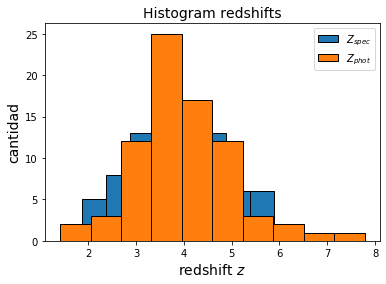

In [25]:
plt.hist(zspec_36,bins=10,edgecolor="k",label="$Z_{spec}$")
plt.hist(zmcmc_36,bins=10,edgecolor="k",label="$Z_{phot}$")
plt.title("Histogram redshifts",fontsize=14)
plt.xlabel("redshift $z$",fontsize=14)
plt.ylabel("cantidad",fontsize=14)
plt.legend()

Text(0.5, 0, '$z_{phot}$')

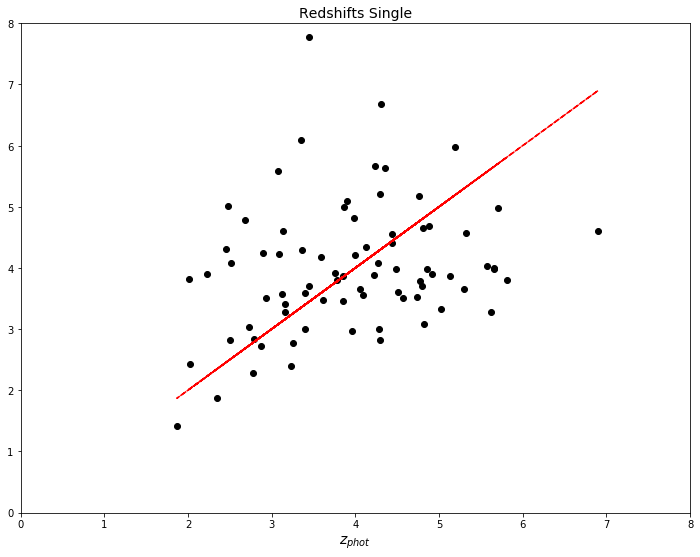

In [26]:
plt.figure(figsize=(12,9))

plt.scatter(zspec_36,zmcmc_36,c="k",marker="o")
plt.xlim([0,8])
plt.ylim([0,8])
plt.plot(zspec_36,zspec_36,c="r",ls="--")

plt.title("Redshifts Single",fontsize=14)
plt.xlabel(r"$z_{esp}$",fontsize=14)
plt.xlabel(r"$z_{phot}$",fontsize=14)

Text(0.5, 0, '$z_{phot}$')

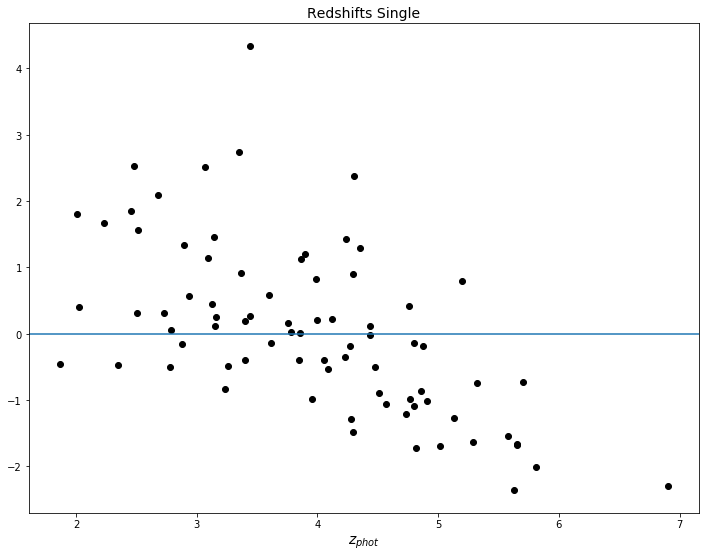

In [30]:
plt.figure(figsize=(12,9))

plt.scatter(zspec_36,np.array(zmcmc_36)-np.array(zspec_36),c="k",marker="o")
plt.axhline(0)

plt.title("Redshifts Single",fontsize=14)
plt.xlabel(r"$z_{esp}$",fontsize=14)
plt.xlabel(r"$z_{phot}$",fontsize=14)

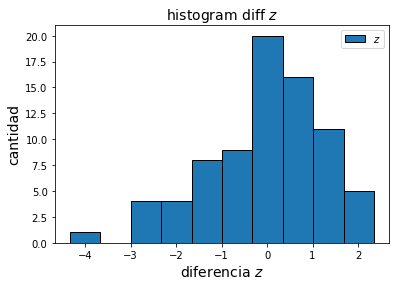

In [31]:
plt.hist(np.array(zspec_36)-np.array(zmcmc_36),bins=10,edgecolor="k",label="$z$")
plt.title("histogram diff $z$",fontsize=14)
plt.xlabel("diferencia $z$",fontsize=14)
plt.ylabel("cantidad",fontsize=14)
plt.legend()

In [32]:
np.std(np.array(zspec_36)-np.array(zmcmc_36))

1.2715881394638324

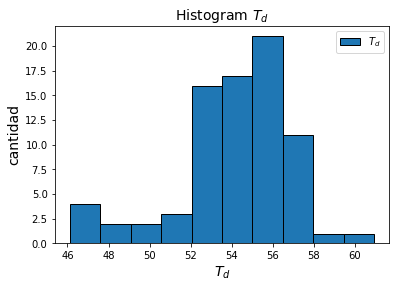

In [33]:
plt.hist(Tmcmc_36,bins=10,edgecolor="k",label="$T_{d}$")
plt.title("Histogram $T_{d}$",fontsize=14)
plt.xlabel("$T_{d}$",fontsize=14)
plt.ylabel("cantidad",fontsize=14)
plt.legend()

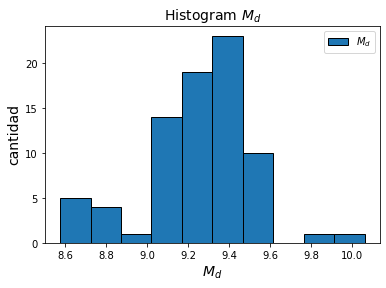

In [34]:
plt.hist(Mmcmc_36,bins=10,edgecolor="k",label="$M_{d}$")
plt.title("Histogram $M_{d}$",fontsize=14)
plt.xlabel("$M_{d}$",fontsize=14)
plt.ylabel("cantidad",fontsize=14)
plt.legend()

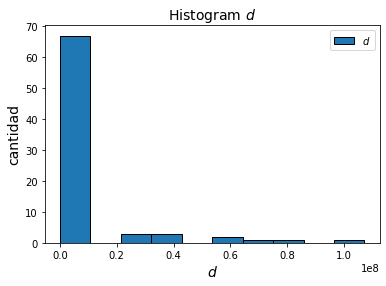

In [35]:
plt.hist(dmcmc_36,bins=10,edgecolor="k",label="$d$")
plt.title("Histogram $d$",fontsize=14)
plt.xlabel("$d$",fontsize=14)
plt.ylabel("cantidad",fontsize=14)
plt.legend()